<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity/blob/main/notebooks/ag_skylines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import pdb

def addPoint(pl, x, y):
  if len(pl) > 0:
    if pl[-1][1] == y:
      return
    if pl[-1][0] == x:
      x0, y0 = pl[-1]
      pl[-1] = (x0, max(y0, y))
      return
    
  pl.append((x, y))

def mergePolylines(p1, p2):
  result = []
  n1, n2 = len(p1), len(p2)
  i, j = 0, 0
  yleft, yright = 0, 0
  while i < n1 or j < n2:
    if j >= n2 or i < n1 and p1[i][0] < p2[j][0]:
      x, yleft = p1[i]
      i += 1
    else:
      x, yright = p2[j]
      j += 1
    y = max(yleft, yright)
    addPoint(result, x, y)

  return result

def skyline(rects: list, i, f: int):
  if i == f:
    g, h, d = rects[i]
    return [(g, h), (d, 0)]
  
  mid = (i + f) // 2
  p1 = skyline(rects, i, mid)
  p2 = skyline(rects, mid + 1, f)
  #pdb.set_trace()
  return mergePolylines(p1, p2)

In [2]:
rects = [(3, 13, 9), (1, 11, 5), (19, 18, 22), (3, 6, 7), (16, 3, 25), (12, 7, 16)]
polyline = skyline(rects, 0, len(rects) - 1)
print(polyline)

[(1, 11), (3, 13), (9, 0), (12, 7), (16, 3), (19, 18), (22, 3), (25, 0)]


**WARNING**

Tip: zip, unzipp

In [3]:
a = [1, 2, 3, 4]
b = [2, 4, 6, 8]
c = list(zip(a, b))
print(c)

# forma larga
c = []
for i in range(len(a)):
  c.append((a[i], b[i]))
print(c)

[(1, 2), (2, 4), (3, 6), (4, 8)]
[(1, 2), (2, 4), (3, 6), (4, 8)]


In [4]:
print(a)
print(*a)

# forma larga
for e in a:
  print(e, end=' ')

[1, 2, 3, 4]
1 2 3 4
1 2 3 4 

In [5]:
print(c)
print(*c)
p, q = zip(*c)
print(p)
print(q)

[(1, 2), (2, 4), (3, 6), (4, 8)]
(1, 2) (2, 4) (3, 6) (4, 8)
(1, 2, 3, 4)
(2, 4, 6, 8)


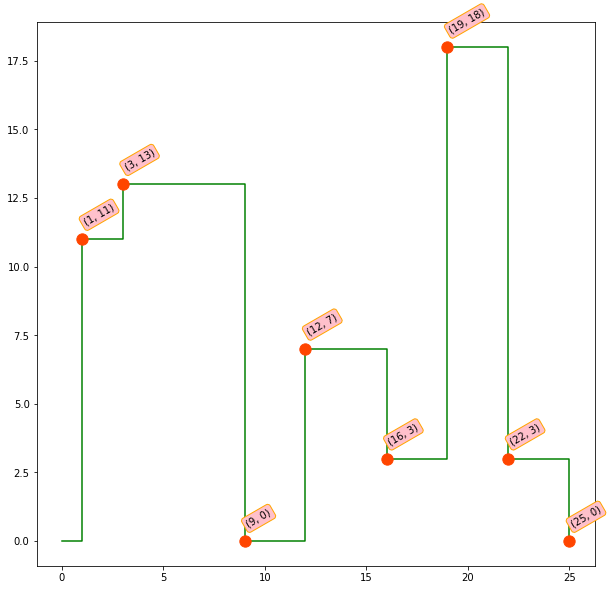

In [78]:
import matplotlib.pyplot as plt

points = [(0, 0)]
for x, y in polyline:
  points.append((x, points[-1][1]))
  points.append((x, y))

x, y = zip(*points)

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x, y, "g-", zorder=0) # g- stands for green line, try b. or r-- for some awesome

x, y = zip(*polyline)
ax.scatter(x, y, s=128, c=["orangered"], zorder=1)
bbox = {'boxstyle': 'round',
        'facecolor': 'pink',
        'edgecolor': 'orange'}
for x, y in polyline:
  ax.text(x, y, f"({x}, {y})", position=(x, y+.5), bbox=bbox, rotation=30)